In [70]:
import numpy as np
import pyamg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

from scipy.sparse.linalg import eigsh
import scipy
%matplotlib inline

In [17]:
results_df = pd.read_csv('Poisson_Perturbed_A_v2.csv')

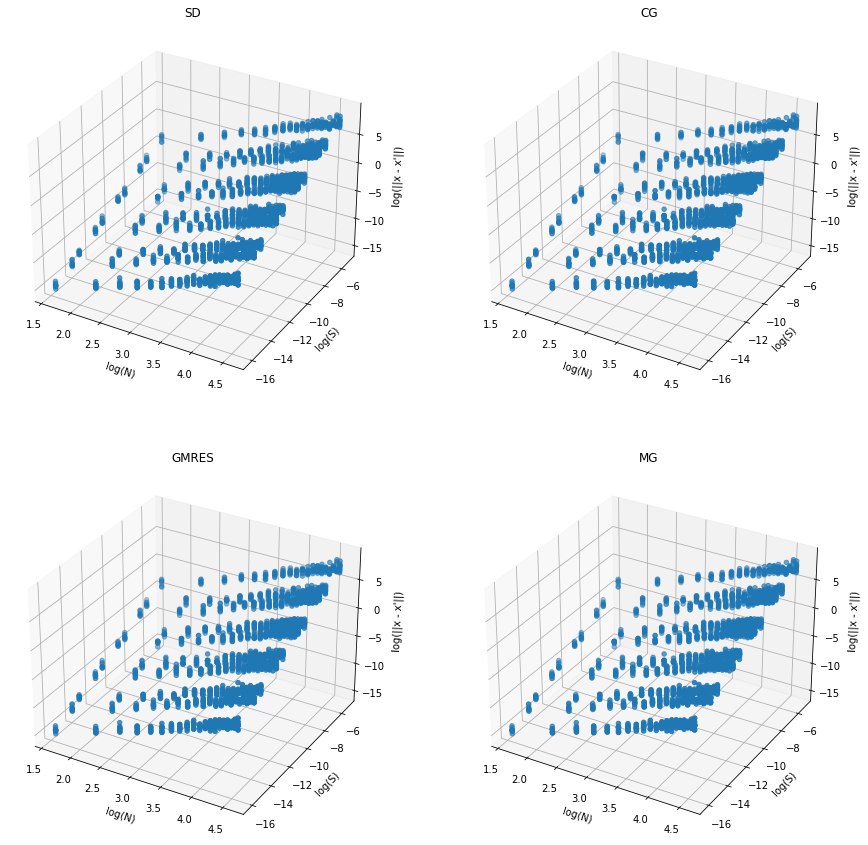

In [119]:
methods = [('SD',1),('CG',2),('GMRES',3),('MG',4)]
target = ['Residual Norm']
features = ['N','sigma']

fig = plt.figure(figsize=(15,15))

for name, index in methods:
    method_results = results_df[results_df['Method']==name]

    X = method_results.loc[:,features]
    Y = method_results.loc[:,target]

#    reg = LinearRegression(normalize=True).fit(np.log(X), np.log(Y))
#    reg.score(np.log(X), np.log(Y)), reg.coef_, reg.intercept_
    
    ax = fig.add_subplot(2, 2, index, projection='3d')
    ax.set_title(name)
    ax.set_xlabel('log(N)')
    ax.set_ylabel('log(S)')
    ax.set_zlabel('log(||x - x\'||)')
    ax.scatter3D(np.log(X[features[0]])/2, np.log(X[features[1]]), np.log(Y), 'gray')

plt.show()

In [93]:
for name, index in methods:
    method_results = results_df[results_df['Method']==name]
    X = method_results.loc[:,features]
    Y = method_results.loc[:,target]
    reg = LinearRegression(normalize=True).fit(np.log(X), np.log(Y))
    print("{} & {} & {} & {} & {}\\\\".format(name, reg.coef_[0,0], reg.coef_[0,1], reg.intercept_[0], reg.score(np.log(X), np.log(Y)),))

SD & 1.913665277634618 & 1.001589069751728 & -4.902106618083268 & 0.9914678878027569\\
CG & 1.9092720013020545 & 1.0017519687620655 & -4.839818221206052 & 0.9910673210337281\\
GMRES & 1.90925468241939 & 1.001752189911895 & -4.839684991833572 & 0.9910680508701356\\
MG & 1.9092547568368148 & 1.0017522385278266 & -4.839684959696424 & 0.9910680430566637\\


In [115]:
for name, index in methods:
    method_results = results_df[results_df['Method']==name]
    X = np.log((method_results[features[0]]**2 * method_results[features[1]]).to_numpy().reshape((-1,1)))
    Y = np.log(method_results.loc[:,target])
    reg = LinearRegression(normalize=True).fit(X, Y)
    print("{} & {}  & {} & {}\\\\".format(name, reg.coef_[0,0], reg.intercept_[0], reg.score(X, Y),))

SD & 0.9804844696643564  & -5.480626615025404 & 0.9909533542915041\\
CG & 0.9795347444670839  & -5.448837509796412 & 0.9904962628139528\\
GMRES & 0.979530778032669  & -5.448819070621999 & 0.9904967724392806\\
MG & 0.979530821269603  & -5.448819185934157 & 0.9904967644043043\\


In [117]:
method = 'GMRES'
target = ['Residual Norm']
features = ['N','sigma']

method_results = results_df[results_df['Method']==method]

X = method_results.loc[:,features]
Y = method_results.loc[:,target]

reg = LinearRegression(normalize=True).fit(np.log(X), np.log(Y))
reg.score(np.log(X), np.log(Y)), reg.coef_, reg.intercept_

(0.9910680508701356, array([[1.90925468, 1.00175219]]), array([-4.83968499]))